# Credit Risk Modeling - Probability of Default

## PD Model Estimation

### 1. Logistic Regression Model
The PD model determines the probability of default (bad) vs non-default (good) based on the formula:
$$P(X) = \frac{e^X}{1-e^X}$$
For example, if X is annual income, low annual income leads to high PD, whereas high annual income leads to low PD. The y-axis (PD) of the logistic curve that has an S shape (logistic sigmoid function) goes from 0 (bad) to 1 (good) with annual income being the x-axis.

**Linear Regression:** $$Y = β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m$$
**Logistic Regression:** $$P(Y=1) = \frac{e^{β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m}}{1 + e^{β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m}}$$
$$P(y_i|x_i)=\frac{1}{1+e^{-(β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m)}}$$
$$Odds = \frac{P(Y=1)}{1-P(Y=1)} = \frac{P(Y=1)}{P(Y=0)} = e^{β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m}$$
We are using logistic regression to model the probability: $$P(y=1∣X) = 𝑃(𝑦=1∣𝑥_{1},𝑥_{2}) = σ(β_0 + β_1x_1 + β_2x_2)$$
The model’s prediction is given by the *logistic (sigmoid) function*: $$σ(z)=\frac{1}{1+e^{−z}}$$
where the model predicts the log-odds of the event happening: $$log-odds=z=𝛽_0+𝛽_1𝑥_1+𝛽_2𝑥_2$$

The function 𝜎(𝑧) transforms the linear combination of the features into a value between 0 and 1, which is interpreted as a probability. This is why we use 𝜎 in logistic regression — it outputs the probability that the binary target variable 𝑦 is equal to 1, given the feature values} 𝑥1,𝑥2, and the model parameters 𝛽0,𝛽1,𝛽2.

The sigmoid function maps a linear combination of the features $$𝛽^{𝑇}.x$$ to a probability between 0 and 1. This allows us to model binary outcomes (0 or 1). In logistic regression, the output of 𝜎 represents the probability of the event occurring (e.g., 𝑦=1).

Let's take the logarithm on both sides:
$$\ln (\frac{P(Y=1)}{P(Y=0)}) = \ln(e^{β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m}) = β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m \text{ (Linear Regression)}$$ 
The basis of logistic regression is linear regression. All the independent variables are dummy variables (0 or 1)
$$X_1=1 -> \ln (\frac{P(Y=1|X_1=1)}{P(Y=0|X_1=1)}) = β_0 + β_11 + β_2X_2 + ... + β_mX_m (1)$$
$$X_1=0 -> \ln (\frac{P(Y=1|X_1=0)}{P(Y=0|X_1=0)}) = β_0 + β_10 + β_2X_2 + ... + β_mX_m (2)$$
(1) - (2):
$$\ln (\frac{P(Y=1|X_1=1)}{P(Y=0|X_1=1)}) - \ln (\frac{P(Y=1|X_1=0)}{P(Y=0|X_1=0)})= β_1 . 1 - β_1 . 0 = β_1$$
$$\ln (\frac{odds (Y=1|X_1=1)}{ odds (Y=1|X_1=0)} = β_1$$

The logarithm of the two odds of the two observations is β_1. Let's take the exponential of both sides:
$$\frac{odds (Y=1|X_1=1)}{odds (Y=1|X_1=0)} = e^{β_1}$$

The odds of an event are typically expressed as the ratio of favorable outcomes to unfavorable outcomes.

**Example 1:** Calculate the odds of getting a 3 from a fair die

The probability of rolling a 3 is: $$P(3) = \frac{1}{6}$$
Sine there are 6 possible total outcomes, the number of favorable outcomes is 1, and the number of unfavorable outcomes is 5. Therefore, the odds of getting a 3 are: $$Odds(\frac{favorable}{unfavorable})=\frac{1}{5}$$

**Example 2:** Calculate the odds of being non-default (good) based on higher education
$$\ln(\frac{P(non-default)}{P(default)}) = \ln (\frac{P(Y=1)}{P(Y=0)}) = -3.91 + 0.24X$$ where: 
- X=1 (if Higher education)
- X=0 (if NO Higher education)
Therefore:
$$\frac{odds(non-default|\text{Higher Ed})}{odds(non-default|\text{NO Higher Ed})} = e^{0.24} = 1.27$$
$$odds(non-default|\text{Higher Ed}) = 1.27 \times odds(non-default|\text{NO Higher Ed})$$

The odds of being good when they have higher education is 1.27 times higher than when they don't have higher education. So if the borrower has higher education, the odds of them being good are 27% higher.

### 2. Likelihood Function
The likelihood function for logistic regression, given 𝑛 data points (𝑥𝑖,𝑦𝑖), is the product of the probabilities of each data point (joint probability of data points, assuming they are independent):
$$𝐿(𝛽_0,𝛽_1,𝛽_2)=∏_{i=1}^{n}𝑃(𝑦_𝑖∣𝑥_𝑖)$$
$$𝐿(𝛽_0,𝛽_1)=𝑃(𝑦_1∣𝑥_1).P(y_2|x_2)$$
$$𝐿(𝛽)=∏_{i=1}^{n}𝑃(𝑦_𝑖∣𝑥_𝑖,𝛽)$$
For each data point, the probability 𝑃(𝑦𝑖∣𝑥𝑖) is:
$$𝑃(𝑦_𝑖∣𝑥_𝑖)=𝜎(𝛽_0+𝛽_1𝑥_{𝑖1}+𝛽_2𝑥_{𝑖2})^{𝑦_𝑖}(1−𝜎(𝛽_0+𝛽_1𝑥_{𝑖1}+𝛽_2𝑥_{𝑖2}))^{1−𝑦_𝑖}$$
$$𝑃(𝑦_𝑖∣𝑥_𝑖,𝛽)=𝜎(𝛽^Tx_i)^{y_i}(1-𝜎(𝛽^Tx_i))^{1-y_i}$$
where:
$$𝑃(𝑦_𝑖=1∣𝑥_𝑖,𝛽)=𝜎(𝛽^Tx_i)=\frac{1}{1+e^{-(𝛽^Tx_i)}}$$
$$𝑃(𝑦_𝑖=0∣𝑥_𝑖,𝛽)=1-𝜎(𝛽^Tx_i)$$
So the **likelihood** is the probability of observing the given data as a function of the model parameters (product of the probability density (or mass) function at each data point). For logistic regression, the likelihood function represents the probability of observing the actual outcomes (0 or 1) given the feature values and the model's parameters:
$$𝐿(𝛽_0,𝛽_1,𝛽_2)=∏_{i=1}^{n}[𝜎(𝛽_0+𝛽_1𝑥_{𝑖1}+𝛽_2𝑥_{𝑖2})^{𝑦_𝑖}(1−𝜎(𝛽_0+𝛽_1𝑥_{𝑖1}+𝛽_2𝑥_{𝑖2}))^{1−𝑦_𝑖}]$$
$$L(𝛽)=∏_{i=1}^{n}𝜎(𝛽^Tx_i)^{y_i}(1-𝜎(𝛽^Tx_i))^{1-y_i}$$
The **log-likelihood** is the natural logarithm of the likelihood function, used to simplify calculations of derivatives, indicating how well a set of model parameters explains the observed data (measure of model uncertainty):
$$log𝐿(𝛽_0,𝛽_1,𝛽_2)=∑_{i=1}^{n}[𝑦_𝑖log(𝜎(𝛽_0+𝛽_1𝑥_{𝑖1}+𝛽_2𝑥_{𝑖2}))+(1−𝑦_𝑖)log(1−𝜎(𝛽_0+𝛽_1𝑥_{𝑖1}+𝛽_2𝑥_{𝑖2}))]$$
$$log𝐿(𝛽_0,𝛽_1)=𝑦_1log(𝜎(𝛽_0+𝛽_1𝑥_1))+(1−𝑦_1)log(1−𝜎(𝛽_0+𝛽_1𝑥_1))+𝑦_2log(𝜎(𝛽_0+𝛽_1𝑥_2))+(1−𝑦_2)log(1−𝜎(𝛽_0+𝛽_1𝑥_2))$$
$$logL(𝛽)=∑_{i=1}^{n}log(𝜎(𝛽^Tx_i)^{y_i}(1-𝜎(𝛽^Tx_i))^{1-y_i})=∑_{i=1}^{n}[y_ilog(𝜎(𝛽^Tx_i))+(1-y_i)log(1-𝜎(𝛽^Tx_i))]$$
where:
$$y_ilog(𝜎(𝛽^Tx_i)): \text{ rewards higher probabilities of predicting yi=1 accurately}$$
$$(1-y_i)log(1-𝜎(𝛽^Tx_i)):\text{ rewards higher probabilities of predicting yi=0 accurately}$$

**Maximum Likelihood Estimation (MLE):** $$\hat{β}=\arg \max_{\beta}logL(β)$$
This can be solved by setting the derivative of logL(β) to 0.
- The goal is to find the optimal model parameters 𝛽0,𝛽1,𝛽2 that maximize the log-likelihood, i.e., the parameters that make the observed data most likely under the model.
- The log-likelihood function is computed by summing over all data points and combining the predicted probabilities from the logistic function with the actual outcomes.
- We update the parameters using gradient descent, where the gradients of the log-likelihood with respect to the parameters guide how to adjust the parameters to improve the model.

This process continues until the log-likelihood is maximized (or until the parameters converge). **Convergence** refers to the point where the parameters (𝛽0,𝛽1,𝛽2) stop changing significantly with each iteration, meaning the optimization algorithm has found the best estimates for the parameters using **gradient descent**, and further updates are either very small or nonexistent. This occurs when:
- ∣ΔL∣<ϵ (eg. 𝜖=10^−6): The change in the log-likelihood function between iterations becomes negligible.
- ∣Δβ∣<ϵ: The change in the parameters (eg. Δ𝛽0,Δ𝛽1,Δ𝛽2) becomes smaller than a predefined threshold (where Δ𝛽 is the vector of changes in the parameters).

When the parameters stop changing significantly, the MLE process is complete.

### 3. Fisher Information Matrix
The Fisher Information is the expected value of the second derivative of the log-likelihood function with respect to the model parameters. It provides a measure of the amount of information the data contains about the parameters. 

A high Fisher Information implies that the parameters can be estimated precisely, while a low Fisher Information means that the estimates will have high variance.

- **First Derivative (Score Function):** how much the log-likelihood changes with respect to the parameters

- **Second Derivative (Fisher Information matrix):** a measure of the amount of information the data carries about the parameters (how precise the parameter estimates can be)
$$\frac{∂logL(β)}{∂β_0}= ∑_{i=1}^{n}[y_i−σ(β_0+β_1x_{i1}+β_2x_{i2})]$$
$$\frac{∂logL(β)}{∂β_1}= ∑_{i=1}^{n}[(y_i−σ(β_0+β_1x_{i1}+β_2x_{i2})).x_{i1}]$$
$$𝐼(𝛽)=−𝐸[\frac{∂^2log⁡𝐿(𝛽)}{∂𝛽^2}]$$
For logistic regression, the Fisher Information matrix 𝐼(𝛽) is: $$𝐼(𝛽)=𝑋^𝑇𝑊𝑋$$

Where:
- 𝑋: the matrix of input features (with each row being a sample, and each column a feature)
- 𝑊: is a diagonal matrix with elements based on predicted probabilities (a weighted matrix that represents the uncertainty in the predictions of each sample)
$$𝑤_𝑖=𝜎(𝛽^𝑇𝑥_𝑖)(1−𝜎(𝛽^𝑇𝑥_𝑖)) = 𝑃(𝑦_𝑖=1∣𝑥_𝑖) \times [1−𝑃(𝑦_𝑖=1∣𝑥_𝑖)$$

### 4. Cramér-Rao Bound (CRB)
The Cramér-Rao Bound gives a lower bound on the variance of any unbiased estimator of a parameter, allowing us to evaluate how well our logistic regression model is performing in terms of estimating the coefficients.

It tells us that no estimator can have a variance smaller than the inverse of the Fisher Information matrix. In other words, if we have an unbiased estimator 𝛽^ of the true coefficient 𝛽, then the variance of 𝛽^ satisfies:
$$Var(\hat{𝛽})≥𝐼(𝛽)^{−1}=(𝑋^𝑇𝑊𝑋)^{-1}=\frac{1}{det(𝐼(𝛽))}.adj(𝐼(𝛽))$$
The Cramér-Rao bound tells us that the **best possible estimator** (i.e., the estimator with the lowest variance) is the inverse of the Fisher Information matrix.

### 5. Problem Example

We have two data points with the following vectors and target values:
$$y_1=0: x_1=1, x_2=2$$
$$y_1=1: x_1=3, x_2=4$$
**Step 1: Logistic Regression Model**

Predict the probability: $$P(y=1∣x)=σ(β_0+β_1x_1+β_2x_2)$$
where the logistic (sigmoid) function is: $$σ(z)=\frac{1}{1+e^{-z}}$$
Assume the parameters (coefficients) as: $$β_0=0, β_1=0, β_2=0$$
then initially, the model predicts a probability of 0.5 for both samples: $$σ(0)=\frac{1}{1+e^{-0}}=0.5$$
**Step 2: Log-Likelihood**
$$log𝐿(𝛽_0,𝛽_1,𝛽_2)=∑_{i=1}^{n}[𝑦_𝑖log(𝜎(𝛽_0+𝛽_1𝑥_{𝑖1}+𝛽_2𝑥_{𝑖2}))+(1−𝑦_𝑖)log(1−𝜎(𝛽_0+𝛽_1𝑥_{𝑖1}+𝛽_2𝑥_{𝑖2}))]$$
- Sample 1 (y=0): $$logL_1=0⋅log(σ(0))+(1−0)⋅log(1−σ(0))=log(0.5)$$
- Sample 2 (y=1): $$logL_2=1⋅log(σ(0))+(1−1)⋅log(1−σ(0))=log(0.5)$$

**Total Log-Likelihood:** $$logL=log(0.5)+log(0.5)=2log(0.5)≈−1.3863$$
**Gradient of the Log-Likelihood (MLE):** calculate the gradient of log⁡𝐿(𝛽) with respect to the parameters 𝛽0,𝛽1,𝛽2 to maximize the log-likelihood. 

From Step 1: $$𝛽_0=0, 𝛽_1=0, 𝛽_2=0:\text{ predicted probabilities }𝜎(𝑧_1)=0.5, 𝜎(𝑧_2)=0.5$$

These gradients are the partial derivatives of the log-likelihood function:
$$\frac{∂logL(β)}{∂β_0}=∑_{i=1}^n(y_i−σ(β^Tx_i))=(0−0.5)+(1−0.5)=−0.5+0.5=0$$
$$\frac{∂logL(β)}{∂β_1}=∑_{i=1}^n(y_i−σ(β^Tx_{i1}))=(0−0.5)×1+(1−0.5)×3=−0.5+1.5=1$$
$$\frac{∂logL(β)}{∂β_2}=∑_{i=1}^n(y_i−σ(β^Tx_{i2}))=(0−0.5)×2+(1−0.5)×4=−1+2=1$$
**Iteration and Optimization:** Using optimization techniques (like *gradient ascent, Newton’s method,* or *L-BFGS*), the parameters 𝛽0,𝛽1,𝛽2 will be updated iteratively to maximize the log-likelihood function.

**a. First Update:** Using **gradient descent** to update the parameters (suppose the learning rate is 𝛼=0.1), the parameter updates are:
$$β_0^{(new)}=β_0^{(old)}−α\frac{∂logL(β)}{∂β_0}=0−0.1\times0=0$$
$$β_1^{(new)}=β_1^{(old)}−α\frac{∂logL(β)}{∂β_1}=0−0.1×1=−0.1$$
$$β_2^{(new)}=β_2^{(old)}−α\frac{∂logL(β)}{∂β_2}=0−0.1×1=−0.1$$
Compute the **new log-likelihood** with the updated parameters, and repeat the gradient descent steps until convergence:
- Predicted probability of sample 1: $$z_1=β_0+β_1x_1+β_2x_2=0+(−0.1)×1+(−0.1)×2=−0.3$$
$$σ(z_1)=\frac{1}{1+e^{0.3}}≈0.425$$
$$logL_1=(1−0)log(1−0.425)=log(0.575)≈−0.554$$
- Predicted probability of sample 2: $$z_2=β_0+β_1x_1+β_2x_2=0+(−0.1)×3+(−0.1)×4=−0.7$$
$$σ(z_2)=\frac{1}{1+e^{0.7}}≈0.331$$
$$logL_2=1×log(0.331)≈−1.104$$
- Total log-likelihood of the first update: $$logL(β)=−0.554−1.104=−1.658$$

**b. Second Update:** Compute the gradients for the log-likelihood with respect to the parameters 𝛽0,𝛽1,𝛽2, using the updated predicted probabilities
$$\frac{∂logL(β)}{∂β_0}=∑_{i=1}^n(y_i−σ(β^Tx_i))=(0−0.425)+(1−0.331)=−0.425+0.669=0.244$$
$$\frac{∂logL(β)}{∂β_1}=∑_{i=1}^n(y_i−σ(β^Tx_{i1}))=(0−0.425)×1+(1−0.331)×3=−0.425+2.007=1.582$$
$$\frac{∂logL(β)}{∂β_2}=∑_{i=1}^n(y_i−σ(β^Tx_{i2}))=(0−0.425)×2+(1−0.331)×4=−0.85+2.676=1.826$$
Update the parameters:
$$β_0^{(new)}=β_0^{(old)}−α\frac{∂logL(β)}{∂β_0}=0−0.1×0.244=−0.0244$$
$$β_1^{(new)}=β_1^{(old)}−α\frac{∂logL(β)}{∂β_1}=−0.1−0.1×1.582=−0.2582$$
$$β_2^{(new)}=β_2^{(old)}−α\frac{∂logL(β)}{∂β_2}=−0.1−0.1×1.826=−0.2826$$
Recalculate log-likelihood: If the change in the log-likelihood between iterations is very small, we would stop and consider the parameters as converged.

**Check for Convergence:** Let's say after several more iterations, we observe that the parameters are changing very little, and the log-likelihood is no longer increasing significantly. For instance:
- In the third iteration, 𝛽0,𝛽1,𝛽2 might be updated to −0.03,−0.26,−0.28, respectively.
- After the fifth iteration, the parameters might settle around 𝛽0=−0.02,𝛽1=−0.25,𝛽2=−0.28.
At this point, the gradients (the changes in the parameters) become smaller and smaller, indicating that we are near the optimal values of the parameters that maximize the likelihood of observing the data under the model, meaning the algorithm has converged.

**Step 3: Fisher Information Matrix**
$$𝐼(𝛽)=𝑋^𝑇𝑊𝑋$$
- **Feature Matrix X** (a matrix of input features): $$\mathbf{X}=\begin{bmatrix}1&2\\3&4\end{bmatrix}$$
Thus: $$\mathbf{X^T}=\begin{bmatrix}1&3\\2&4\end{bmatrix}$$
- **Predicted Probabilities W** (a diagonal matrix with elements): $$𝑤_𝑖=𝜎(𝛽^𝑇𝑥_𝑖)(1−𝜎(𝛽^𝑇𝑥_𝑖))$$
From Step 1. the predicted probability is: $$\hat{y_i}=σ(β^Tx_i)=0.5$$ Therefore: $$w_1=σ(0)(1−σ(0))=0.5×0.5=0.25$$
$$w_2=σ(0)(1−σ(0))=0.5×0.5=0.25$$
- **Weighted Matrix W**: $$\mathbf{W}=\begin{bmatrix}0.25&0\\0&0.25\end{bmatrix}$$
- **Fisher Information Matrix:**
$$𝐼(𝛽)=𝑋^𝑇𝑊𝑋=\begin{bmatrix}1&3\\2&4\end{bmatrix}\begin{bmatrix}0.25&0\\0&0.25\end{bmatrix}\begin{bmatrix}1&2\\3&4\end{bmatrix}=\begin{bmatrix}(1\times0.25+3\times0)&(1\times0+3\times0.25)\\(2\times0.25+4\times0)&(2\times0+4\times0.25)\end{bmatrix}\begin{bmatrix}1&2\\3&4\end{bmatrix}=\begin{bmatrix}0.25&0.75\\0.5&1\end{bmatrix}\begin{bmatrix}1&2\\3&4\end{bmatrix}$$
$$=\begin{bmatrix}(0.25\times1+0.75\times3)&(0.25\times2+0.75\times4)\\(0.5\times1+1\times3)&(0.5\times2+1\times4)\end{bmatrix}=\begin{bmatrix}2.5&3.5\\3.5&5\end{bmatrix}$$

The values in this matrix provide us with a measure of how sensitive the log-likelihood function is to changes in the parameters 𝛽0,𝛽1,𝛽2.
- The diagonal elements represent the **variances** of the parameter estimates (i.e., the uncertainty in each parameter).
- The off-diagonal elements represent the **covariances** between the parameter estimates.

**Step 4: Cramér-Rao Bound**

The lower bound on the variance of the estimates of 𝛽: $$Var(\hat{𝛽})≥𝐼(𝛽)^{−1}=(𝑋^𝑇𝑊𝑋)^{-1}=\frac{1}{det(𝐼(𝛽))}.adj(𝐼(𝛽))$$
For a 2x2 matrix: $$\mathbf{A}=\begin{bmatrix}a&b\\c&d\end{bmatrix}$$
The inverse matrix is: $$\mathbf{A^{-1}}=\frac{1}{ad-bc}\begin{bmatrix}d&-b\\-c&a\end{bmatrix}$$
From Step 3: $$𝐼(𝛽)=\begin{bmatrix}2.5&3.5\\3.5&5\end{bmatrix}$$
The determinant of I(β): $$det(I(β))=2.5×5−3.5×3.5=0.25$$
$$𝐼(𝛽)^{-1}=\frac{1}{0.25}\begin{bmatrix}5&-3.5\\-3.5&2.5\end{bmatrix}=\begin{bmatrix}20&-14\\-14&10\end{bmatrix}$$
- The variance of the first parameter 𝛽1 is 20
- The variance of the second parameter 𝛽2 is 10
- The covariance between the two parameters is -14
- **Cramér-Rao Lower Bound (CRLB):** no unbiased estimator of the parameters 𝛽1,𝛽2 can have a variance smaller than 20 and 10, respectively, and the covariance cannot be smaller than -14
$$Var(\hat{𝛽_1})≥20$$
$$Var(\hat{𝛽_2})≥10$$
$$Cov(\hat{𝛽_1},\hat{𝛽_2})≥-14$$

### Import Libraries

In [26]:
import numpy as np
import pandas as pd

### Load the Data and Selecting the Features

**Import Data**

In [27]:
# Make sure the first column is the index
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0) #, header = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0) #, header = 0)

**Explore Data**

In [28]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [29]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [30]:
loan_data_inputs_train.shape

(373028, 324)

In [31]:
loan_data_targets_train.shape

(373028, 1)

In [32]:
loan_data_inputs_test.shape

(93257, 324)

In [33]:
loan_data_targets_test.shape

(93257, 1)

### Select the Features

In [34]:
# Select a limited set of input variables in a new dataframe
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [35]:
# Store the names of the reference category dummy variables in a list
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

Whatever dummy not included in the training process will become the benchmark.

In [36]:
# From the dataframe with input variables, drop the variables with variable names in the list with reference categories 
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [37]:
inputs_train.shape

(373028, 104)

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [39]:
# Create an instance of an object from the 'LogisticRegression' class
reg = LogisticRegression()

In [40]:
# Set the pandas dataframe options to display all columns/rows
pd.options.display.max_rows = None

In [41]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\My Pham\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\My Pham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Display the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class
reg.intercept_

array([1.1185927])

In [43]:
# Display the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class
reg.coef_

array([[ 0.97751613,  0.77864259,  0.5932616 ,  0.42977548,  0.30157286,
         0.13665859,  0.09681418,  0.11705154,  0.01951607,  0.04988816,
         0.05703646,  0.05702463,  0.06539894,  0.12768629,  0.090059  ,
         0.18023324,  0.23538631,  0.21636078,  0.25464188,  0.30986589,
         0.50767916,  0.10717643, -0.00274057,  0.30966673,  0.20371514,
         0.22488593,  0.26943793,  0.0541791 ,  0.07563854,  0.01509544,
         0.03997306,  0.00439093, -0.02644337,  0.        ,  0.74407464,
         0.56041157,  0.47524272,  0.30178258,  0.1564998 , -0.08801745,
        -0.28859891,  0.99304734,  0.63854825,  0.39544003,  0.17443943,
         0.03211133,  0.03343814,  0.08676135,  0.12118854,  0.11279915,
         0.07815659,  0.02951542, -1.08023761, -1.22450073, -1.36090221,
         0.30302666,  0.19149586,  0.16404838,  0.15275354,  0.13558675,
         0.1699822 ,  0.1079904 ,  0.11376359,  0.16855177, -0.02198152,
         0.02235947,  0.20436189,  0.03946813,  0.0

In [44]:
# Store the names of the columns of a dataframe in a variable
feature_name = inputs_train.columns.values

In [45]:
# Create a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Create a new column in the dataframe, called 'Coefficients' with row values the transposed coefficients from the 'LogisticRegression' object
summary_table['Coefficients'] = np.transpose(reg.coef_)

# Increase the index of every row of the dataframe with 1
summary_table.index = summary_table.index + 1

# Assign values of the row with index 0 of the dataframe
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# Sort the dataframe by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.118593
1,grade:A,0.977516
2,grade:B,0.778643
3,grade:C,0.593262
4,grade:D,0.429775
5,grade:E,0.301573
6,grade:F,0.136659
7,home_ownership:OWN,0.096814
8,home_ownership:MORTGAGE,0.117052
9,addr_state:NM_VA,0.019516


### Build a Logistic Regression Model with P-Values

### **P-values for sklearn logistic regression**

We'll only keep the relevant features by computing the p-values for the coefficients using Fisher Information and Cramér-Rao bounds. This method is designed for calculating the statistical significance of each coefficient in the logistic regression model.

- **Estimated Coefficients:** These are the coefficients that the logistic regression model has estimated from the data.
- **Denominator for Fisher Information:** This is computed as **2×(1+cosh⁡(decision function))**, where *decision_function(X)* is the predicted values before applying the logistic sigmoid (log odds).
- **Fisher Information Matrix:** The Fisher Information is given by the matrix $$𝐹_{𝑖𝑗}=𝑋^{⊤}⋅\frac{𝑋}{denom}$$which approximates the variance of the regression coefficients.
- **Cramér-Rao Bound (Standard Errors):** The inverse of the Fisher Information Matrix is computed, and its diagonal elements are the estimated standard errors for each coefficient - the minimum possible standard errors. Smaller values indicate more precise estimates of the coefficients.
- **Z-scores:** how many standard errors the coefficients are away from zero. Higher values mean the coefficients are statistically significant. The z-scores for the coefficients are calculated as the ratio of the coefficients to their standard errors. $$z_i=\frac{\hat{\beta_i}-\beta_i}{\sqrt{Var(\hat{\beta_i})}}$$ where βi is the true value and β^ is the estimate.
- **P-values:** Using the z-scores, two-tailed p-values are computed by applying the standard normal cumulative distribution function (CDF), using *norm.sf from scipy.stats.* These indicate whether the coefficients are statistically significant. P-values less than **α=0.05** typically indicate that the corresponding coefficient is significantly different from zero.
$$\phi(z) \text{ is the CDF of the standard normal distribution}$$
$$\text{For a one-tailed test: }$$
$$p = 1-\phi(z) \text{ if testing for }\hat{\beta}>0$$
$$p = \phi(z) \text{ if testing for }\hat{\beta}<0$$
$$\text{For a two-tailed test: }$$
$$p = 2\times(1-\phi(|z|))$$

In [48]:
# Find columns with all 0's to prevent errors in the calculation
zero_columns = inputs_train.columns[(inputs_train == 0).all()]
zero_columns

Index(['emp_length:10'], dtype='object')

In [50]:
# Remove those columns from the dataframe
inputs_train = inputs_train.drop(columns = zero_columns)
inputs_train.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:NM_VA',
       'addr_state:NY',
       ...
       'mths_since_last_delinq:Missing', 'mths_since_last_delinq:4-30',
       'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57',
       'mths_since_last_record:Missing', 'mths_since_last_record:3-20',
       'mths_since_last_record:21-31', 'mths_since_last_record:32-80',
       'mths_since_last_record:81-86', 'mths_since_last_record:>86'],
      dtype='object', length=103)

In [59]:
# Create class to display p-values for logistic regression in sklearn

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    # Initialize the logistic regression model
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs, solver='lbfgs', max_iter=1000) #, penalty='l2') #,**args)
    # Train the logistic model using features X and label y
    def fit(self,X,y):
        # y = y.values.ravel()  # Convert y to 1D array
        # y = y.squeeze()  # Convert y to a 1D array if it has a single column
        self.model.fit(X,y)
        
        # Get p-values for the fitted model 
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X)))) # denominator of Fisher Information Matrix
        denom = np.tile(denom,(X.shape[1],1)).T                          # creating a matrix where each row is a copy of the denom vector
        F_ij = np.dot((X / denom).T,X)                                   # Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij)                                 # Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))               # estimated standard errors for each coefficient
        z_scores = self.model.coef_[0] / sigma_estimates                 # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]          # two-tailed test for p-values
        self.coef_ = self.model.coef_                                    # model coefficients
        self.intercept_ = self.model.intercept_                          # model intercept
        self.p_values = p_values                                         # p-values

**Optional:** We'll check for multicollinearity using the Variance Inflation Factor (VIF), which measures how much the variance of a regression coefficient is inflated due to collinearity with other variables. If we find any features with high VIF, we can consider removing them. Another method we can try is calculating the correlation matrix between the variables.

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check VIF for 'inputs_train' (any variable with high VIF will need to be removed)
X = inputs_train.copy()
X['intercept'] = 1  # Add intercept to the features

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif_data)

If two or more features are perfectly correlated, it can lead to multicollinearity issues during model fitting. We can check for highly correlated features and remove features with very high correlations (e.g., above 0.9).

In [61]:
# Check for correlation between features
correlation_matrix = inputs_train.corr()
# print(correlation_matrix)

In [62]:
# Create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class
reg = LogisticRegression_with_p_values()

In [63]:
# Estimate the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe
reg.fit(inputs_train, loan_data_targets_train.squeeze())

In [ ]:
# # Alternative method using logit without Fisher Information matrix
# import statsmodels.api as sm

# class LogisticRegression_with_p_values:
#     def __init__(self):
#         self.model = None

#     def fit(self, X, y):
#         X = sm.add_constant(X)  # Add an intercept column to the input features
#         self.model = sm.Logit(y, X).fit()  # Fit the logistic regression model
#         self.coef_ = self.model.params  # Model coefficients
#         self.p_values = self.model.pvalues  # p-values for the coefficients
#         self.intercept_ = self.model.params[0]  # Intercept value
#         print(self.model.summary())  # Print model summary, which includes p-values

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# inputs_train_scaled = scaler.fit_transform(inputs_train)

# # Fit the model with the scaled data
# reg = LogisticRegression_with_p_values()
# reg.fit(inputs_train_scaled, loan_data_targets_train.squeeze())

In [ ]:
# # Alternative method using regularization to reduce overfitting
# class LogisticRegression_with_p_values:
#     def __init__(self):
#         self.model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

#     def fit(self, X, y):
#         y = y.ravel()  # Flatten the target variable to 1D
#         self.model.fit(X, y)  # Fit the logistic regression model
#         self.coef_ = self.model.coef_  # Model coefficients
#         self.intercept_ = self.model.intercept_  # Model intercept
#         print(self.model.coef_)  # Print model coefficients (just for debug)

# # Scale input data
# scaler = StandardScaler()
# inputs_train_scaled = scaler.fit_transform(inputs_train)

# reg = LogisticRegression_with_p_values()
# reg.fit(inputs_train_scaled, loan_data_targets_train)

In [72]:
# Same as above
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.540569
1,grade:A,0.950425
2,grade:B,0.759732
3,grade:C,0.575343
4,grade:D,0.410693
5,grade:E,0.281384
6,grade:F,0.114980
7,home_ownership:OWN,0.094271
8,home_ownership:MORTGAGE,0.116413
9,addr_state:NM_VA,0.026804


In [73]:
# Take the result of the newly added method 'p_values' and store it in a variable 'p_values'
p_values = reg.p_values

In [74]:
# Add the intercept for completeness (add the value 'NaN' in the beginning of the variable with p-values)
p_values = np.append(np.nan, np.array(p_values))

In [75]:
# Add p-values to the summary table
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.540569,NaN
1,grade:A,0.950425,1.125347e-24
2,grade:B,0.759732,5.287236e-34
3,grade:C,0.575343,3.888671e-23
4,grade:D,0.410693,1.062026e-13
5,grade:E,0.281384,1.049463e-08
6,grade:F,0.114980,2.461727e-02
7,home_ownership:OWN,0.094271,3.265448e-06
8,home_ownership:MORTGAGE,0.116413,5.798258e-20
9,addr_state:NM_VA,0.026804,4.050047e-01


Each original independent variable is represented by several dummy variables. 

If the coefficients for all of these dummy variables are statistically significant, we should retain all of them. 

If the coefficients for none of the dummy variables are statistically significant, we should remove all of them.

If one or few dummy variables representing one original independent variable are statistically significant, it would be best to retain all dummy variables that represent that original independent variable.

Conventionally, if a p-value is lower than 0.05, we conclude that the coefficient of a variable is statistically significant.

Therefore, for the final model, we remove: delinq_2yrs, open_acc, pub_rec, total_rev_hi_limt and total_acc.

In [76]:
# Remove some features, the coefficients for all or almost all of the dummy variables not statistically significant
# Specify another list of dummy variables as reference categories, and a list of variables to remove
# Then drop the two datasets from the original list of dummy variables

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [77]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [81]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [82]:
# Find columns with all 0's to prevent errors in the calculation
zero_columns = inputs_train.columns[(inputs_train == 0).all()]
zero_columns

Index(['emp_length:10'], dtype='object')

In [83]:
# Remove those columns from the dataframe
inputs_train = inputs_train.drop(columns = zero_columns)
inputs_train.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:NM_VA',
       'addr_state:NY', 'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 'addr_state:WI_MT',
       'addr_state:TX', 'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS',
       'addr_state:WV_NH_WY_DC_ME_ID', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:credit_card',
       'purpose:debt_consolidation', 'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'initial_list_status:w',
       'term:36', 'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'mths_since_issue_d:<38', 'mths_since_issue_d:38-39',
       'mths_since_issue_d:40-41', 'mths_since_issue_d:42-48',
       'mths_since_issue_d:49-52', 'mths_since_issue_d:53-64',
    

In [84]:
# Run a new model
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train.values.ravel())

In [85]:
feature_name = inputs_train.columns.values

In [86]:
# Same as above
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.895311
1,grade:A,0.950450
2,grade:B,0.757666
3,grade:C,0.573379
4,grade:D,0.408917
5,grade:E,0.280116
6,grade:F,0.113856
7,home_ownership:OWN,0.097017
8,home_ownership:MORTGAGE,0.116136
9,addr_state:NM_VA,0.027289


In [87]:
# Add the 'p_values' here similar to the previous step
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
# Get the results for our final PD model
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.895311,NaN
1,grade:A,0.950450,1.020920e-24
2,grade:B,0.757666,6.625002e-34
3,grade:C,0.573379,4.749874e-23
4,grade:D,0.408917,1.218974e-13
5,grade:E,0.280116,1.065321e-08
6,grade:F,0.113856,2.530405e-02
7,home_ownership:OWN,0.097017,1.617892e-06
8,home_ownership:MORTGAGE,0.116136,4.930061e-20
9,addr_state:NM_VA,0.027289,3.963387e-01


In [88]:
import pickle
# Export our model to a 'SAV' file 
pickle.dump(reg2, open('pd_model.sav', 'wb'))

**Interprete the Coefficients (β) in the PD model**
$$ln(\frac{odds(Y=1|X_j=1)}{odds(Y=1|X_j=0)})=β_j$$
$$\frac{odds(Y=1|X_j=1)}{odds(Y=1|X_j=0)}=e^{β_{i}}$$
On the S curve:
- Y=0 (Bad): Lower βj, Higher PD
- Y=1 (Good): Greater βj, Lower PD
We use reference categories (their β=0), so the odds of being Good for that observation will be e^0.

For example, let's look at the grade variable with grade G being the reference category since A is the best one and G is the worst. In fact, the coefficients of grades A-F are positive and greater than grade G's. That means observations with these grades are all better than observations with grade G.

Furthermore, going from F to A, we can see that the coefficients increase in magnitude, meaning the odds of being good are increasing as the grade is increasing. For example, the odds of being good with grade D compared to the odds of being good with grade G:
$$\frac{odds(Y=1|grade=D)}{odds(Y=1|grade=G)}=e^{β_D}=e^{0.5012}=1.65$$
$$odds(Y=1|grade=D)=1.65\times odds(Y=1|grade=G)$$
Similarly: $$odds(Y=1|grade=B)=2.42\times odds(Y=1|grade=G)$$
Thus:
$$\frac{odds(Y=1|grade=B)}{odds(Y=1|grade=D)}=\frac{2.42\times odds(Y=1|grade=G)}{1.65\times odds(Y=1|grade=G)}=\frac{2.42}{1.65}=1.4671$$
$$odds(Y=1|grade=B)=1.4671\times odds(Y=1|grade=D)$$
Also:
$$\frac{odds(Y=1|grade=B)}{odds(Y=1|grade=D)}=e^{β_B-β_D}=e^{0.8845-0.5012}=e^{0.3833}=1.4671$$
Direct comparisons are possible only between categories coming from one and the same original independet variable. For example, it won't be possible to compare between grade B and employment length of 5/6 years because the two groups won't be mutually exclusive.

### PD Model Validation (Test)

**Out-of-sample validation (test)**

We split the data into train and test datasets. We used the train dataset to train (estimate) the model. Now we're going to use the test dataset to test the model.

In [89]:
# From the dataframe with inputs for testing, keep the same variables used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [90]:
# Keep the variable names for the reference categories, only for the variables used in our final PD model
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [93]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test = inputs_test.drop(columns='emp_length:10')
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


Now we will estimate the probability of default of each observation. 

**logistic_regression_model.predict(df with independent variables)**
1) multiples the values of the variables by the model coefficients, yielding the log of odds of being good
2) an exponent is raised to the power of the log of odds, yielding the odds of being good and the estimated probability of being good
3) the estimated probabilities are categorized into being good or bad by applying a cut-off
The default cut-off is 0.5 or 50%.
- Estimated probability <=50%: Bad (0)
- Estimated probability >50%: Good (1)

In [94]:
# Calculate the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test # an array of predicted discrete classess (0s and 1s)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

There are other possible cut-offs, for instance, 0.3. In the same way, we can select any value between 0 and 1 to be the cut-off. Thus, it is much more important to obtain the RAW probabiliby predictions.

**model.predict_proba(inputs)** returns the probability that the output is 1.

Thus, the **predict** method returns all probabilities to belong to each of the classes and the **predict_proba** method returns predicted class, being the one with the highest estimated probability.

In [95]:
# Calculate the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba # an array of arrays of predicted class probabilities for all classes

array([[0.07457596, 0.92542404],
       [0.13879619, 0.86120381],
       [0.11252844, 0.88747156],
       ...,
       [0.0235125 , 0.9764875 ],
       [0.04224145, 0.95775855],
       [0.04935191, 0.95064809]])

In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0, and the second value is the probability for the observation to belong to the first class, i.e. 1. Thus the first column is PD (bad), the second column is 1-PD (good).

In [96]:
# Take all the arrays in the array, and from each array, take all rows, and only the element with the second element (probabilities=1)
y_hat_test_proba[:][:,1]

array([0.92542404, 0.86120381, 0.88747156, ..., 0.9764875 , 0.95775855,
       0.95064809])

In [97]:
# Store these probabilities of being 1 in a variable
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
y_hat_test_proba 

array([0.92542404, 0.86120381, 0.88747156, ..., 0.9764875 , 0.95775855,
       0.95064809])

This is an array of only good variable. We can put the actual ood_bad variable and the prediction in one dataframe.

In [98]:
# Reset the index of a dataframe
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [99]:
# Concatenate two dataframes
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.shape

(93257, 2)

In [100]:
# Make the index of one dataframe equal to the index of another dataframe
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.925424
288564,1,0.861204
213591,1,0.887472
263083,1,0.935548
165001,1,0.965865


### PD Model Evaluation

**Accuracy and Area under the Curve**

Estimated probability <= Cut-off probability: Bad (Default)

Estimated probability > Cut-off probability: Good (Non-Default)

In [101]:
# Create a new column with an indicator where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0
# tr = 0.5
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [102]:
# Create a Confusion Matrix cross-table where the actual values are displayed by rows and the predicted values by columns.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7142,2900
1,35463,47752


Out of all the obsevations that are actually good, more than 83,000 are correctly predicted to be good, and only 5 are predicted to be bad. However, from all the observations that are bad, only 6 are correctly predicted to be bad while more than 10,000 are predicted to be bad. Under a threshold of 0.5, the model generates a lot of false positives. 

In our loan use case, a lot of bad applicants will be given loans, which is not acceptable. That's what happens when we keep the default threshold. To fix that, we usually use a more conservative threshold, i.e. tr=0.9.

In [103]:
# Divide each value of the table by the total number of observations, thus getting percentages, or, rates
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.076584,0.031097
1,0.380272,0.512047


In [104]:
# Calculate Accuracy of the model, which is the sum of the diagonal rates
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5886314164084196

The accuracy is much lower with the threshold of 0.9 compared it 0.5, but the confusion matrix has much lower false positives as well as lower true positives.

If a lender uses this model, they would reduce the number of defaults, but also the overall approved loans. So tr=0,9 might be a little too conservative since we want to minimize the risk, but still give out loans.

To fix that, we use **Receiver Operating Charateristic (ROC)**, which shows how well a binary classifier model performs at different threshold values on the curve. It plots the true positive rate (TPR) against the false positive rate (FPR) for each threshold. Each point on the curve is a threshold corresponding to a different confusion matrix.
|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  |     TN      |     FP      |
| **Actual 1**  |     FN      |     TP      |
- TN (True Negative): The number of actual negative instances that were correctly predicted as negative.
- FP (False Positive): The number of actual negative instances that were incorrectly predicted as positive.
- FN (False Negative): The number of actual positive instances that were incorrectly predicted as negative.
- TP (True Positive): The number of actual positive instances that were correctly predicted as positive.
  
Recall the confusion matrix for Hypothesis Testing:
|                          | Predicted H₀ (Do not Reject H₀) | Predicted H₁ (Reject H₀) |
|--------------------------|---------------------------------|---------------------------|
| **True H₀ (Actual)**     |                TN               |             FP (Type I Error)           |
| **True H₁ (Actual)**     |                FN (Type II Error)               |             TP            |
- True Positive (TP): Correctly rejecting H₀ when H₁ is true.
- False Positive (FP): Incorrectly rejecting H₀ when H₀ is actually true (Type I error).
- False Negative (FN): Incorrectly failing to reject H₀ when H₁ is actually true (Type II error).
- True Negative (TN): Correctly failing to reject H₀ when H₀ is true.

**Confusion Matrix Scores:**
- **Accuracy:** The overall accuracy of the classifier (the percentage of correct predictions) $$Accuracy=\frac{𝑇𝑃+𝑇𝑁}{𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁}$$
- **Precision (Positive Predictive Value):** the proportion of positive predictions that are actually correct $$Precision=\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}$$
- **Recall (Sensitivity, True Positive Rate):** the proportion of actual positives that were correctly identified $$Recall=\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁}$$
- **F1-Score:** the harmonic mean of precision and recall, providing a balance between them $$\text{F1-Score}=2×\frac{Precision×Recall}{Precision+Recall}$$
- **Specificity (True Negative Rate):** the proportion of actual negatives that were correctly identified $$Specificity=\frac{𝑇𝑁}{𝑇𝑁+𝐹𝑃}$$
- **False Positive Rate (FPR):** the proportion of negative instances that were incorrectly classified as positive $$FPR=\frac{𝐹𝑃}{𝑇𝑁+𝐹𝑃}$$
- **False Negative Rate (FNR):** the proportion of positive instances that were incorrectly classified as negative $$FNR=\frac{𝐹𝑁}{𝑇𝑃+𝐹𝑁}$$
- **Matthews Correlation Coefficient (MCC):** a more balanced measure used for binary classification, taking all elements of the confusion matrix into account. MCC ranges from -1 (perfectly incorrect) to +1 (perfectly correct), with 0 indicating no better than random guessing. $$MCC=\frac{𝑇𝑃×𝑇𝑁−𝐹𝑃×𝐹𝑁}{\sqrt{(𝑇𝑃+𝐹𝑃)(𝑇𝑃+𝐹𝑁)(𝑇𝑁+𝐹𝑃)(𝑇𝑁+𝐹𝑁)}}$$

In [106]:
# Return the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities
from sklearn.metrics import roc_curve, roc_auc_score

roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980084, 0.99980084,
        1.        ]),
 array([0.00000000e+00, 1.20170642e-05, 2.28324220e-04, ...,
        9.99975966e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.9939575 , 0.98987575, ..., 0.53748009, 0.52683779,
        0.49594076]))

As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

In [107]:
# Store each of the three arrays in a separate variable.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

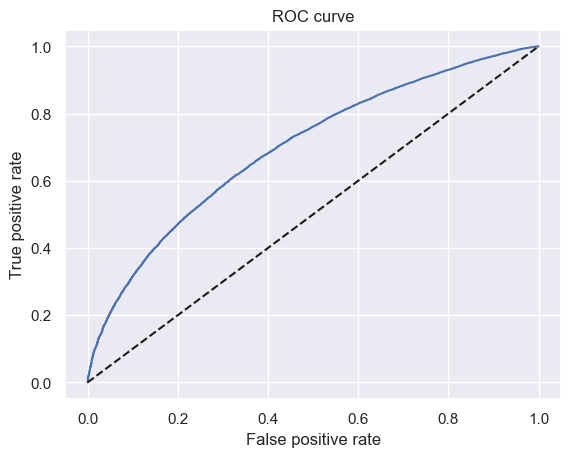

In [109]:
# Plot the false positive rate along the x-axis and the true positive rate along the y-axis, thus plotting the ROC curve
plt.plot(fpr, tpr)
# Plot a seconary diagonal line, with dashed line style and black color
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# Name the x-axis "False positive rate"
plt.xlabel('False positive rate')
# Name the x-axis "True positive rate"
plt.ylabel('True positive rate')
# Name the graph "ROC curve"
plt.title('ROC curve')

The curve is ROC, and the 4-degree dotted line is the benchmark (predicting by chane). The true positive rate of the ROC curve is better than the one predicted by chance.

How much better? The area under the ROC curve is called **AUC (Area Under the Curve)**, which measures how good a classification model is. 

For example, the area under the curve for predicting by chance is 50%. Accordingly, we can calculate the are under the ROC curve as well.

In [110]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) from a set of actual values and their predicted probabilities
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6981516972583443

| Interpretation | Area under the ROC curve |
|---------------|--------------------------|
| **Bad**  |     50-60%      |
| **Poor**  |     60-70%      |
| **Fair**  |     70-80%      |
| **Good**  |     80-90%      |
| **Excellent**  |     90-100%      |

Thus, our model is barely fair. This is why it's typical to build few competing models for every analytical solutions within application industry. These competing models are usually built by different competing modelers or teams of modelers.

**Gini and Kolmogorov-Smirnov**

These are two coefficients that are well established and widely accepted in the credit risk modeling communiity for evaluation of model performance.

**Gini coefficient:** originially a measure of the inequality between rich and poor individuals in an economy. 
- In credit risk modeling, Gini is utilized with the same purpose to measure inequality between non-defaulted (good borrowers) and defaulted (bad borrowers) in a population.
- The Gini coefficient is measured by plotting the cumulative proportion of defaulted (bad borrowers) as a function of the cumulative proportion of all borrowers (S curve: X-axis: Cumulative % All, Y-axis: Cumulative % Defaulted).
- The Gini coefficient is the percentage of the area above the secondary diagonal line enclosed between the concave curve and the secondary diagonal line. The greater the area, the better the model. $$Gini=AUROC\times2-1$$
$$AUROC=\frac{Gini+1}{2}$$
  
**Kolmogorov-Smirnov (K-s) coefficient:** shows to what extent the model separates the actual good borrowers from the actual bad borrowers.
- It is measured by looking at the cumulative distributions of actual good borrowers and actual bad borrowers with respect to the estimated probabilities of being good and bad by our model.
- Kolmogorov-Smirnov (K-s) is the maximum difference between the cumulative distribution functions of 'good' and 'bad' borrowers with respect to predicted probabilities. The greater the difference, the better the model.
  - Perfect model -> Maximum distance -> K-S=1
  - Predicting by chance -> Almost no distance -> K-S=0

In order to plot the Gini graph for our data, first we need to order our dataframe that contains the targets and the probabilities by the estimated probabilities in ascending order.

In [111]:
# Sort a dataframe by the values of a specific column
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
2808,0,0.495941,0
11208,0,0.516074,0
165242,1,0.526838,0
175979,1,0.527890,0
10876,0,0.537480,0


In [112]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
291631,1,0.990950,1
266566,1,0.991358,1
242624,1,0.991877,1
42098,1,0.993343,1
42417,1,0.993958,1


In [113]:
# Reset the index of a dataframe and overwrite it
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,2808,0,0.495941,0
1,11208,0,0.516074,0
2,165242,1,0.526838,0
3,175979,1,0.527890,0
4,10876,0,0.537480,0


In [114]:
# Calculate the cumulative number of all observations using the new index
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# Calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# Calculate cumulative number of 'bad', which is the difference between the cumulative number of all observations and cumulative number of 'good' for each row
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,2808,0,0.495941,0,1,0,1
1,11208,0,0.516074,0,2,0,2
2,165242,1,0.526838,0,3,1,2
3,175979,1,0.527890,0,4,2,2
4,10876,0,0.537480,0,5,2,3


In [115]:
# Calculate the cumulative percentage of all observations
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# Calculate cumulative percentage of 'good'
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# Calculate the cumulative percentage of 'bad'
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,2808,0,0.495941,0,1,0,1,0.000011,0.000000,0.000100
1,11208,0,0.516074,0,2,0,2,0.000021,0.000000,0.000199
2,165242,1,0.526838,0,3,1,2,0.000032,0.000012,0.000199
3,175979,1,0.527890,0,4,2,2,0.000043,0.000024,0.000199
4,10876,0,0.537480,0,5,2,3,0.000054,0.000024,0.000299


In [116]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,291631,1,0.990950,1,93253,83211,10042,0.999957,0.999952,1.0
93253,266566,1,0.991358,1,93254,83212,10042,0.999968,0.999964,1.0
93254,242624,1,0.991877,1,93255,83213,10042,0.999979,0.999976,1.0
93255,42098,1,0.993343,1,93256,83214,10042,0.999989,0.999988,1.0
93256,42417,1,0.993958,1,93257,83215,10042,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

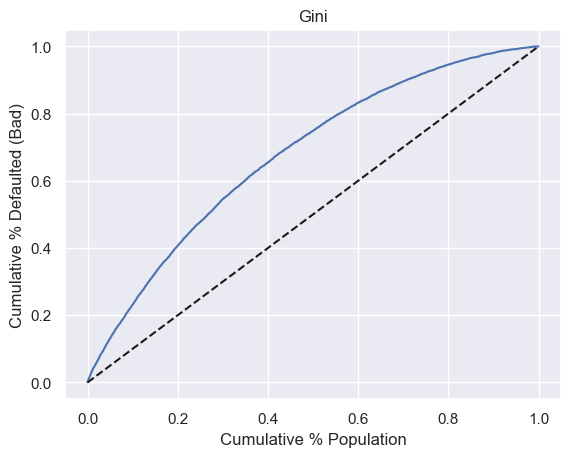

In [117]:
# Plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis, thus plotting the Gini curve
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Defaulted (Bad)')
plt.title('Gini')

In [118]:
# Calculate Gini from AUROC
Gini = AUROC * 2 - 1
Gini

0.3963033945166885

This is not a bad value.

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

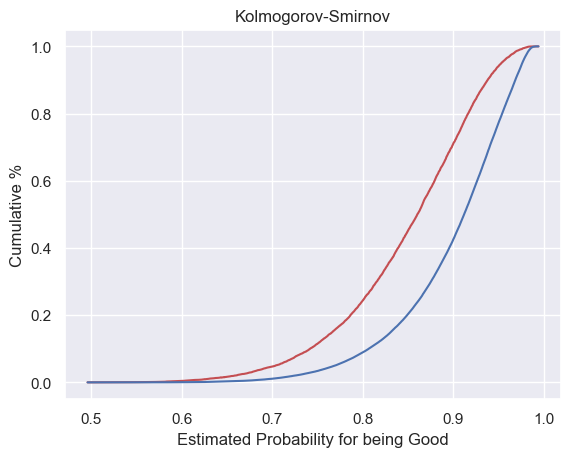

In [119]:
# Plot KS
# Plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis, colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# Plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis, colored in blue.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

The Kolmogorov-Smirnov criterion is the maximum difference between the red and the blue curves.

In [120]:
# Calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad' and the cumulative percentage of 'good'
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2881162507482394

The value isn't too high, but also not equal to one. However, it is significantly greater than zero. This value shows that the two cumulative distribution functions are sufficiently far away from each other and the model has satisfactory predictive power.

### Apply the PD Model

**Calculate PD of individual accounts**

Since all values are dummy variables of 0 and 1, calculating the power on which the exponent should be raised to obtain the odds boils down to the summing the regression coefficients for all dummy categories to which an observation belongs.

We'll use the inputs test with reference categories.

In [121]:
# Set the pandas dataframe options to display all columns/ rows
pd.options.display.max_columns = None
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [122]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.895311,NaN
1,grade:A,0.950450,1.020920e-24
2,grade:B,0.757666,6.625002e-34
3,grade:C,0.573379,4.749874e-23
4,grade:D,0.408917,1.218974e-13
5,grade:E,0.280116,1.065321e-08
6,grade:F,0.113856,2.530405e-02
7,home_ownership:OWN,0.097017,1.617892e-06
8,home_ownership:MORTGAGE,0.116136,4.930061e-20
9,addr_state:NM_VA,0.027289,3.963387e-01


The first row has an index of 362514. First, we take the intercept, -1.338497. Then, the external grade of this observation is C. We add its respective coefficient or 0.689618 to the intercept to get -0.648879.

Next, we look at homeowner status. As we can see, the borrower has a mortgage with the coefficient of 0.106222. When we add it to the total up to now, we get -0.542657. 

According to the data, the borrower lives in California, so we can add the coefficient for California or 0.064466 and get -0.478191.

The verification status is verified, but there's no coefficient for this verification status because we used it as a reference category. Hence, we get 0 and the total remains unchanged.

Next, the loan purpose is either major purchase or car or home improvement. The coefficient for that dummy variable is 0.265831. If we add it to the total, we'll get -0.21236.

We can go on until we've added all the relevant coefficients to get a final sum of 2.50279. These are the log-odds: $$ln(\frac{1-PD}{PD})=2.50279$$
$$\frac{1-PD}{PD}=e^{2.50279}=12.216531$$
The estimated probability of being a good borrower (1-PD): $$1-PD=\frac{12.216531}{12.216531+1}=0.924337$$

In [123]:
y_hat_test_proba

array([0.92542404, 0.86120381, 0.88747156, ..., 0.9764875 , 0.95775855,
       0.95064809])

Therefore, the probability that this borrower will not default is 92%. Similarly, we can calculate the probability of default of each new customer.

In practice, it's slightly different since banks use scorecards, which have the advantage of being standardized. No matter the model, the scorecards look the same way. This makes them much more interpretale for non-technical people and allows us to compare different models.

Applying a scorecard is just like applying the PD model itself. A scorecard tool produces an individual credit worthiness assessment that directly corresponds to a specific probability of default. Because these credit worthiness assessments are named after the scorecard, they are called credit scores.

We'll create a scorecard based on our PD model by storing the coefficients of our PD model in a dataframe called summary table. It contains regression coefficients for all independent dummy variables except for the reference categories. 

We're not allowed to include the reference categories when estimating the model. However, when using it to predict probability of default, we just take those as zeros.

**Create a Scorecard**

In [124]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [125]:
# Create a new dataframe with one column whose values are the values from the 'reference_categories' list
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# Create a second column, called 'Coefficients', which contains only 0 values
df_ref_categories['Coefficients'] = 0
# Create a third column, called 'p_values', with contains only NaN values
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


This way, we'll get the output from our PD model as if we had included the reference categories in model estimation and had coefficients of 0.

In [126]:
# Concatenate two dataframes
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Reset the index of a dataframe
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,1.895311,NaN
1,1,grade:A,0.950450,1.020920e-24
2,2,grade:B,0.757666,6.625002e-34
3,3,grade:C,0.573379,4.749874e-23
4,4,grade:D,0.408917,1.218974e-13
5,5,grade:E,0.280116,1.065321e-08
6,6,grade:F,0.113856,2.530405e-02
7,7,home_ownership:OWN,0.097017,1.617892e-06
8,8,home_ownership:MORTGAGE,0.116136,4.930061e-20
9,9,addr_state:NM_VA,0.027289,3.963387e-01


In [127]:
# Create a new column, called 'Original feature name', which contains the value of the 'Feature name' column, up to the column symbol
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,1.895311,NaN,Intercept
1,1,grade:A,0.950450,1.020920e-24,grade
2,2,grade:B,0.757666,6.625002e-34,grade
3,3,grade:C,0.573379,4.749874e-23,grade
4,4,grade:D,0.408917,1.218974e-13,grade
5,5,grade:E,0.280116,1.065321e-08,grade
6,6,grade:F,0.113856,2.530405e-02,grade
7,7,home_ownership:OWN,0.097017,1.617892e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.116136,4.930061e-20,home_ownership
9,9,addr_state:NM_VA,0.027289,3.963387e-01,addr_state


In order to create a scorecard, we need to turn the regression coefficients from our PD model into simple scores.

We also need the minimum and the maximum of the credit worthiness assessment that can be obtained from the PD model. Higher coefficients correspond to being a better borrower (better credit worthiness).

The minimum credit assessment is reached when a borrower falls into the 'worst' categories for all variables (lowest model coefficients). The maximum credit assessment is reached when a borrower falls into the 'best' categories for all variables (highest model coefficients).

In [128]:
# FICO scores
min_score = 300
max_score = 850

In [129]:
# Group the data by the values of the 'Original feature name' column
# Aggregate the data in the 'Coefficients' column, calculating their minimum
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                      1.895311
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.066182
dti                            0.000000
emp_length                    -0.027176
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -1.733035
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.283117
mths_since_last_delinq         0.000000
mths_since_last_record        -0.612353
purpose                        0.000000
term                           0.000000
verification_status           -0.002584
Name: Coefficients, dtype: float64

In [130]:
# Aggregate further and sum all the minimum values
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-0.8291356704824839

In [131]:
# Group the data by the values of the 'Original feature name' column
# Aggregate the data in the 'Coefficients' column, calculating their maximum
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                      1.895311
acc_now_delinq                 0.138512
addr_state                     0.513098
annual_inc                     0.591911
dti                            0.385558
emp_length                     0.037632
grade                          0.950450
home_ownership                 0.116136
initial_list_status            0.055702
inq_last_6mths                 0.000000
int_rate                       1.016169
mths_since_earliest_cr_line    0.122430
mths_since_issue_d             0.753529
mths_since_last_delinq         0.130623
mths_since_last_record         0.000000
purpose                        0.300826
term                           0.075375
verification_status            0.103604
Name: Coefficients, dtype: float64

In [132]:
# Aggregate further and sum all the maximum values
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

7.186866305357316

$$\text{variable score} =\text{variable coef}\times \frac{\text{(max score - min score)}}{\text{(max sum coef - min sum coef)}}$$

In [133]:
# Multiply the value of the 'Coefficients' column by the ration of the differences between max and min scores and max and min sums of cefficients
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,1.895311,NaN,Intercept,130.042520
1,1,grade:A,0.950450,1.020920e-24,grade,65.212977
2,2,grade:B,0.757666,6.625002e-34,grade,51.985576
3,3,grade:C,0.573379,4.749874e-23,grade,39.341139
4,4,grade:D,0.408917,1.218974e-13,grade,28.056894
5,5,grade:E,0.280116,1.065321e-08,grade,19.219498
6,6,grade:F,0.113856,2.530405e-02,grade,7.812007
7,7,home_ownership:OWN,0.097017,1.617892e-06,home_ownership,6.656603
8,8,home_ownership:MORTGAGE,0.116136,4.930061e-20,home_ownership,7.968387
9,9,addr_state:NM_VA,0.027289,3.963387e-01,addr_state,1.872347


The score corresponding to the intercept is very close to the minimum score in the worst case scenario.
$$\text{intercept score}=\frac{\text{(intercept coef - min score)}}{\text{(max sum coef - min sum coef)}}\times(\text{max score - min score})+\text{min score}$$

The first part will place the coefficient for the intercept on a scale between 0 and 1 (0: possible minimum, 1: possible maximum). The product will turn the scale from 0 to the difference between the maximum and the minimum desired. In our case, this difference would be 850-300 (550). Then, we add the minimum score to get the intercept score.

In [134]:
# Divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients
# Then, multiply that by the difference between the maximum score and the minimum score
# Then, add minimum score
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16052\2504913922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,1.895311,NaN,Intercept,486.931804
1,1,grade:A,0.950450,1.020920e-24,grade,65.212977
2,2,grade:B,0.757666,6.625002e-34,grade,51.985576
3,3,grade:C,0.573379,4.749874e-23,grade,39.341139
4,4,grade:D,0.408917,1.218974e-13,grade,28.056894
5,5,grade:E,0.280116,1.065321e-08,grade,19.219498
6,6,grade:F,0.113856,2.530405e-02,grade,7.812007
7,7,home_ownership:OWN,0.097017,1.617892e-06,home_ownership,6.656603
8,8,home_ownership:MORTGAGE,0.116136,4.930061e-20,home_ownership,7.968387
9,9,addr_state:NM_VA,0.027289,3.963387e-01,addr_state,1.872347


In [135]:
# Round the values of the 'Score - Calculation' column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,1.895311,NaN,Intercept,486.931804,487.0
1,1,grade:A,0.950450,1.020920e-24,grade,65.212977,65.0
2,2,grade:B,0.757666,6.625002e-34,grade,51.985576,52.0
3,3,grade:C,0.573379,4.749874e-23,grade,39.341139,39.0
4,4,grade:D,0.408917,1.218974e-13,grade,28.056894,28.0
5,5,grade:E,0.280116,1.065321e-08,grade,19.219498,19.0
6,6,grade:F,0.113856,2.530405e-02,grade,7.812007,8.0
7,7,home_ownership:OWN,0.097017,1.617892e-06,home_ownership,6.656603,7.0
8,8,home_ownership:MORTGAGE,0.116136,4.930061e-20,home_ownership,7.968387,8.0
9,9,addr_state:NM_VA,0.027289,3.963387e-01,addr_state,1.872347,2.0


Let's check if the minimum possible score and the maximum possible score are equal to the desired minimum and maximum scores.

In [136]:
# Group the data by the values of the 'Original feature name' column
# Aggregate the data in the 'Coefficients' column, calculating their minimum
# Sum all minimum values
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [137]:
# Group the data by the values of the 'Original feature name' column
# Aggregate the data in the 'Coefficients' column, calculating their maximum
# Sum all maximum values
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

The maximum score is 851. Thus, 1 has to be subtracted from the maximum score for one original variable. We'll evaluate based on differences.

In [138]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,1.895311,NaN,Intercept,486.931804,487.0,0.068196
1,1,grade:A,0.950450,1.020920e-24,grade,65.212977,65.0,-0.212977
2,2,grade:B,0.757666,6.625002e-34,grade,51.985576,52.0,0.014424
3,3,grade:C,0.573379,4.749874e-23,grade,39.341139,39.0,-0.341139
4,4,grade:D,0.408917,1.218974e-13,grade,28.056894,28.0,-0.056894
5,5,grade:E,0.280116,1.065321e-08,grade,19.219498,19.0,-0.219498
6,6,grade:F,0.113856,2.530405e-02,grade,7.812007,8.0,0.187993
7,7,home_ownership:OWN,0.097017,1.617892e-06,home_ownership,6.656603,7.0,0.343397
8,8,home_ownership:MORTGAGE,0.116136,4.930061e-20,home_ownership,7.968387,8.0,0.031613
9,9,addr_state:NM_VA,0.027289,3.963387e-01,addr_state,1.872347,2.0,0.127653


In [154]:
# Adjust the value of last record with a positive score
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16052\2100497793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,1.895311,NaN,Intercept,486.931804,487.0,0.068196,487.0
1,1,grade:A,0.950450,1.020920e-24,grade,65.212977,65.0,-0.212977,65.0
2,2,grade:B,0.757666,6.625002e-34,grade,51.985576,52.0,0.014424,52.0
3,3,grade:C,0.573379,4.749874e-23,grade,39.341139,39.0,-0.341139,39.0
4,4,grade:D,0.408917,1.218974e-13,grade,28.056894,28.0,-0.056894,28.0
5,5,grade:E,0.280116,1.065321e-08,grade,19.219498,19.0,-0.219498,19.0
6,6,grade:F,0.113856,2.530405e-02,grade,7.812007,8.0,0.187993,8.0
7,7,home_ownership:OWN,0.097017,1.617892e-06,home_ownership,6.656603,7.0,0.343397,7.0
8,8,home_ownership:MORTGAGE,0.116136,4.930061e-20,home_ownership,7.968387,8.0,0.031613,8.0
9,9,addr_state:NM_VA,0.027289,3.963387e-01,addr_state,1.872347,2.0,0.127653,2.0


In [155]:
# Group the data by the values of the 'Original feature name' column
# Aggregate the data in the 'Coefficients' column, calculating their minimum
# Sum all minimum values
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [156]:
# Group the data by the values of the 'Original feature name' column
# Aggregate the data in the 'Coefficients' column, calculating their maximum
# Sum all maximum values
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

858.0

**Calculate Credit Score**

We only have to sum the credit scores corresponding to the respective dummy variables' categories.

In [158]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


We'll use the borrower with index 362514 again. 

First, we take 312 as our starting point (Score-Final of intercept). 

Next, we add the corresponding score of the external grade of this observation (grade C), which is 53, to get a total of 365 points. 

Then, we add score of home ownership being mortgage, which is 8, and get a sum of 373.

Next, knowing the borrower lives in California, we add 5 and reach 378.

We continue the same way, summing up the relevant categories to get a final credit score of 608.

In [159]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,1.895311,NaN,Intercept,486.931804,487.0,0.068196,487.0
1,1,grade:A,0.950450,1.020920e-24,grade,65.212977,65.0,-0.212977,65.0
2,2,grade:B,0.757666,6.625002e-34,grade,51.985576,52.0,0.014424,52.0
3,3,grade:C,0.573379,4.749874e-23,grade,39.341139,39.0,-0.341139,39.0
4,4,grade:D,0.408917,1.218974e-13,grade,28.056894,28.0,-0.056894,28.0
5,5,grade:E,0.280116,1.065321e-08,grade,19.219498,19.0,-0.219498,19.0
6,6,grade:F,0.113856,2.530405e-02,grade,7.812007,8.0,0.187993,8.0
7,7,home_ownership:OWN,0.097017,1.617892e-06,home_ownership,6.656603,7.0,0.343397,7.0
8,8,home_ownership:MORTGAGE,0.116136,4.930061e-20,home_ownership,7.968387,8.0,0.031613,8.0
9,9,addr_state:NM_VA,0.027289,3.963387e-01,addr_state,1.872347,2.0,0.127653,2.0


We calculate credit score by multiplying the values of the dummy variable, which are only 0's and 1's, by the respective scores.

In [160]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [161]:
# Insert a column 'Intercept' with its values being 1s in the dataframe, with an index of 0, that is, in the beginning of the dataframe
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [162]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


We still have to make sure the columns are arranged in the same order.

In [163]:
# From the 'inputs_test_with_ref_cat_w_intercept' dataframe, keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [164]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0


In [165]:
scorecard_scores = df_scorecard['Score - Final']

A good practice is to make sure they have compatible dimensions.

In [166]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 101)

In [167]:
scorecard_scores.shape

(101,)

In [169]:
scorecard_scores = scorecard_scores.values.reshape(101, 1)
scorecard_scores.shape

(101, 1)

In [170]:
# Multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them (the sum of the products)
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores.head()

,0
362514,529.0
288564,483.0
213591,499.0
263083,541.0
165001,586.0


In [171]:
y_scores.tail()

,0
115,490.0
296284,604.0
61777,614.0
91763,572.0
167512,560.0


**From Credit Score to PD**

$$\text{sum of coef from score}=\frac{\text{(total score - min score)}}{\text{(max score - min score)}}\times \text{(max sum coef - min sum coef)}+\text{min sum coef}$$

In [172]:
# Divide the difference between the scores and the minimum score by the difference between the maximum score and the minimum score
# Multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients
# Ddd the minimum sum of coefficients
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [173]:
# Divide an exponent raised to sum of coefficients from score by an exponent raised to sum of coefficients from score plus one
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.924731
288564,0.862713
213591,0.888072
263083,0.936036
165001,0.965749


In [174]:
y_hat_test_proba[0: 5]

array([0.92542404, 0.86120381, 0.88747156, 0.93554845, 0.96586525])

In [175]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.495941
1    0.516074
2    0.526838
3    0.527890
4    0.537480
Name: y_hat_test_proba, dtype: float64

They are not exactly equal because when we calculated the scores, we rounded them. These differences are negligible.

**Set Cut-offs**

The cut-off rate is used for taking a decision whether to approve a loan application or not.
  1. Predetermins the total number of borrowers that will be approved and rejected
  2. Impacts the quality of loans

More loans = Lower quality borrowers

Fewer loans = High quality borrowers

In [176]:
# Confusion matrix
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [177]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7142,2900
1,35463,47752


In [178]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.076584,0.031097
1,0.380272,0.512047


In [179]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5886314164084196

In [180]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980084, 0.99980084,
        1.        ]),
 array([0.00000000e+00, 1.20170642e-05, 2.28324220e-04, ...,
        9.99975966e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.9939575 , 0.98987575, ..., 0.53748009, 0.52683779,
        0.49594076]))

In [181]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

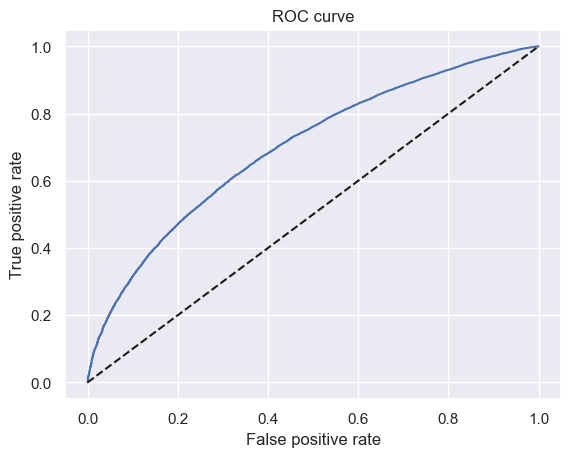

In [183]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [184]:
thresholds

array([       inf, 0.9939575 , 0.98987575, ..., 0.53748009, 0.52683779,
       0.49594076])

In [185]:
thresholds.shape

(17301,)

In [186]:
# Concatenate 3 dataframes along the columns
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [187]:
# Name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.0000,0.000000
1,0.993958,0.0000,0.000012
2,0.989876,0.0000,0.000228
3,0.989849,0.0001,0.000228
4,0.989620,0.0001,0.000288


$$\text{score from prob}=(ln\frac{\text{prob good}}{\text{1 - prob good}}-\text{min sum coef})\times \frac{\text{(max score - min score)}}{\text{(max sum coef - min sum coef)}}+\text{min score}$$

In [188]:
# Let the first threshold be equal to a number, very close to 1 but smaller than 1 (eg. 1 - 1 / 10 ^ 16)
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [189]:
# The score corresponding to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0000,0.000000,1822.0
1,0.993958,0.0000,0.000012,707.0
2,0.989876,0.0000,0.000228,671.0
3,0.989849,0.0001,0.000228,671.0
4,0.989620,0.0001,0.000288,670.0


In [191]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0000,0.000000,850.0
1,0.993958,0.0000,0.000012,707.0
2,0.989876,0.0000,0.000228,671.0
3,0.989849,0.0001,0.000228,671.0
4,0.989620,0.0001,0.000288,670.0


In [192]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17296,0.541009,0.999701,0.999952,368.0
17297,0.538455,0.999701,0.999976,367.0
17298,0.537480,0.999801,0.999976,367.0
17299,0.526838,0.999801,1.000000,364.0
17300,0.495941,1.000000,1.000000,356.0


In [193]:
# Define a function called 'n_approved' which assigns a value of 1 if a predicted probability >= the parameter p (a threshold), and a value of 0, if it is not
# Sum the column
# Thus, if given any percentage values, the function will return the number of rows wih estimated probabilites greater than the threshold
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [194]:
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications
# Thus, calculate the number of approved appliations for al thresholds
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)

# Calculate the number of rejected applications for each threshold (diff between the total applications and approved applications for that threshold)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

# Approval rate equalts the ratio of the approved applications and all applications
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

# Rejection rate equals one minus approval rate
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.993958,0.0000,0.000012,707.0,1,93256,0.000011,0.999989
2,0.989876,0.0000,0.000228,671.0,19,93238,0.000204,0.999796
3,0.989849,0.0001,0.000228,671.0,20,93237,0.000214,0.999786
4,0.989620,0.0001,0.000288,670.0,25,93232,0.000268,0.999732


In [195]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17296,0.541009,0.999701,0.999952,368.0,93250,7,0.999925,0.000075
17297,0.538455,0.999701,0.999976,367.0,93252,5,0.999946,0.000054
17298,0.537480,0.999801,0.999976,367.0,93253,4,0.999957,0.000043
17299,0.526838,0.999801,1.000000,364.0,93255,2,0.999979,0.000021
17300,0.495941,1.000000,1.000000,356.0,93257,0,1.000000,0.000000


In [196]:
# Display the dataframe with cutoffs form line with index 5000 to line with index 6200
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.905382,0.260705,0.541213,512.0,47655,45602,0.511007,0.488993
5001,0.905381,0.260805,0.541213,512.0,47656,45601,0.511018,0.488982
5002,0.905366,0.260805,0.541297,512.0,47663,45594,0.511093,0.488907
5003,0.905366,0.260904,0.541297,512.0,47664,45593,0.511104,0.488896
5004,0.905360,0.260904,0.541393,512.0,47672,45585,0.511190,0.488810
5005,0.905359,0.261004,0.541393,512.0,47673,45584,0.511200,0.488800
5006,0.905355,0.261004,0.541417,512.0,47675,45582,0.511222,0.488778
5007,0.905349,0.261103,0.541417,512.0,47676,45581,0.511232,0.488768
5008,0.905294,0.261103,0.541789,512.0,47707,45550,0.511565,0.488435
5009,0.905293,0.261203,0.541789,512.0,47708,45549,0.511576,0.488424


In [197]:
# Display the dataframe with cutoffs form line with index 1000 to line with index 2000
df_cutoffs.iloc[1000: 2000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953309,0.048795,0.203930,564.0,17460,75797,0.187225,0.812775
1001,0.953308,0.048895,0.203930,564.0,17461,75796,0.187235,0.812765
1002,0.953211,0.048895,0.204518,564.0,17510,75747,0.187761,0.812239
1003,0.953210,0.048994,0.204518,564.0,17511,75746,0.187771,0.812229
1004,0.953194,0.048994,0.204627,564.0,17520,75737,0.187868,0.812132
1005,0.953194,0.049094,0.204627,564.0,17521,75736,0.187879,0.812121
1006,0.953141,0.049094,0.204867,564.0,17541,75716,0.188093,0.811907
1007,0.953141,0.049193,0.204867,564.0,17542,75715,0.188104,0.811896
1008,0.953131,0.049193,0.204951,564.0,17549,75708,0.188179,0.811821
1009,0.953130,0.049293,0.204951,564.0,17550,75707,0.188190,0.811810


A few things to consider:
- If we set the cut-off at no less than 95% probability of being 'good', what would the approval and rejection rate be? What would be the closest equivalent cut-off in terms of credit score?
- No less than 94%?
- At credit score 670 points, what would the approval and rejection rate be? What is the corresponding probability of being 'good'?
- Where should we set the cut-off if we want our approval rate to be just below 14%? What credit score and what probability of being 'good'?

In [198]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [199]:
df_scorecard.to_csv('df_scorecard.csv')